### Interpolation

<function matplotlib.pyplot.show(close=None, block=None)>

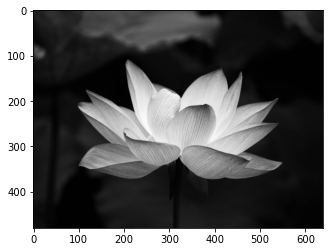

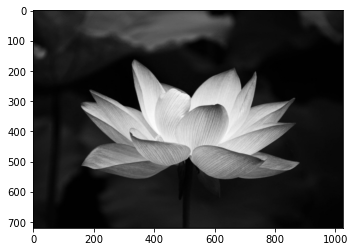

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('canny.jpg',0)

def inter(image: np.ndarray, M:float, N:float):
    p,q = float(image.shape[0]),float(image.shape[1])
    output = np.zeros((int(p*M),int(q*N)))
    for i in range(0,output.shape[0]-1):
        for j in range(0,output.shape[1]-1):
            m1,n1 = float(i)/M, float(j)/N
            m0,n0 = int(np.floor(m1)),int(np.floor(n1))
            a,b = m1-m0,n1-n0
            output[i][j] = (1-a)*(1-b)*img[m0][n0] + a*(1-b)*img[m0+1][n0] + b*(1-a)*img[m0][n0+1] + a*b*img[m0+1][n0+1]
    return output
plt.figure(num=0)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show
plt.figure(num=1)
plt.imshow(inter(img,1.5,1.6),cmap='gray',vmin=0,vmax=255)
plt.show


### Rotation 

<function matplotlib.pyplot.show(close=None, block=None)>

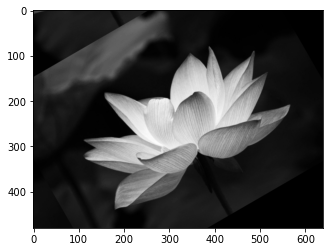

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal

def rotate30(image:np.ndarray):
    output = np.zeros(image.shape)
    sin,cos = np.sin(np.pi/6),np.cos(np.pi/6)
    A = np.array([[cos,sin],[-sin,cos]])
    cm, cn = int(image.shape[0]/2),int(image.shape[1]/2)
    for m2 in range(image.shape[0]):
        for n2 in range(image.shape[1]):
            B = np.matmul(A,np.array([[m2-cm],[n2-cn]]))
            B = B + np.array([[cm],[cn]])
            m1,n1 = B[0][0],B[1][0]
            #interpolation
            m0,n0 = int(np.floor(m1)),int(np.floor(n1))
            a,b = m1-m0,n1-n0
            if (m0 >= image.shape[0] or n0 >= image.shape[1]):
                w=0
            else:
                w=image[m0][n0]
            if (m0+1 >= image.shape[0] or n0 >= image.shape[1]):
                x=0
            else:
                x=image[m0+1][n0]
            if (n0+1 >= image.shape[1] or m0 >= image.shape[0]):
                y=0
            else:
                y=image[m0][n0+1]
            if (m0+1 >= image.shape[0] or n0+1 >= image.shape[1]):
                z=0
            else:
                z=image[m0+1][n0+1]
            
            output[m2][n2] = (1-a)*(1-b)*w + a*(1-b)*x + b*(1-a)*y + a*b*z
    return output

img = cv2.imread('/Users/xuyouwei/Desktop/DISP/canny.jpg',0)

plt.imshow(rotate30(img),cmap='gray',vmin=0,vmax=255)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

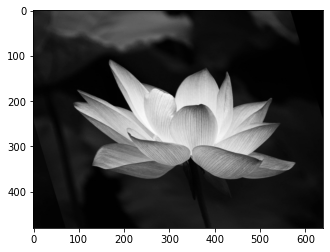

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def shear(image:np.ndarray):
    output = np.zeros(image.shape)
    A = np.array([[1,0],[-0.3,1]])
    cm, cn = int(image.shape[0]/2),int(image.shape[1]/2)
    for m2 in range(image.shape[0]):
        for n2 in range(image.shape[1]):
            B = np.matmul(A,np.array([[m2-cm],[n2-cn]]))
            B = B + np.array([[cm],[cn]])
            m1,n1 = B[0][0],B[1][0]
            #interpolation
            m0,n0 = int(np.floor(m1)),int(np.floor(n1))
            a,b = m1-m0,n1-n0
            if (m0 >= image.shape[0] or n0 >= image.shape[1]):
                w=0
            else:
                w=image[m0][n0]
            if (m0+1 >= image.shape[0] or n0 >= image.shape[1]):
                x=0
            else:
                x=image[m0+1][n0]
            if (n0+1 >= image.shape[1] or m0 >= image.shape[0]):
                y=0
            else:
                y=image[m0][n0+1]
            if (m0+1 >= image.shape[0] or n0+1 >= image.shape[1]):
                z=0
            else:
                z=image[m0+1][n0+1]
            
            output[m2][n2] = (1-a)*(1-b)*w + a*(1-b)*x + b*(1-a)*y + a*b*z
    return output

img = cv2.imread('/Users/xuyouwei/Desktop/DISP/canny.jpg',0)

plt.imshow(shear(img),cmap='gray',vmin=0,vmax=255)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

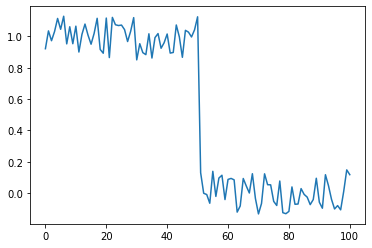

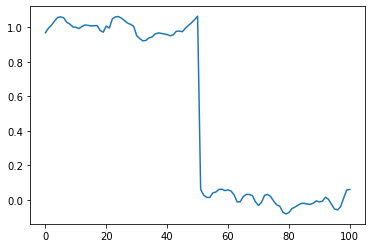

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def noise(an):
    return an*(np.random.rand(101)-0.5)

t = np.arange(101)
x = np.zeros(101)

for i in range(0,51):
    x[i] = 1

y = x + noise(0.3)
x0 = np.zeros(101)

for n in range(0,101):
    ym = np.zeros(21)
    exp1 = np.zeros(21)
    exp2 = np.zeros(21)
    for m in range(n-10,n+11):
        if (m < 0 or m >100):
            ym[m-n+10] = 0
        else:
            ym[m-n+10] = y[m]
        exp1[m-n+10] = np.exp(-0.2*pow((n-m),2))
        if (m < 0 or m > 100):
            exp2[m-n+10] = np.exp(-5*pow(y[n],2))
        else:
            exp2[m-n+10] = np.exp(-5*pow((y[n]-y[m]),2))
    exp3 = exp1*exp2
    x0[n] = np.sum(ym*exp3)/np.sum(exp3)

plt.figure(num=1)
plt.plot(t,y)
plt.show

plt.figure(num=2)
plt.plot(t,x0)
plt.show